In [1]:
from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation
import numpy as np

# Load both datasets
donor_concentration_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/Donor Fragmentation, Aid Shocks and Violent Political Conflict/data　/cleaned_data/separate_two_domains/HHI_state_wide.csv')
aid_shock_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/Donor Fragmentation, Aid Shocks and Violent Political Conflict/data　/cleaned_data/separate_two_domains/AidShock_wide.csv')

print("HHI_state dataset shape:", donor_concentration_df.shape)
print("AidShock dataset shape:", aid_shock_df.shape)

HHI_state dataset shape: (156, 37)
AidShock dataset shape: (156, 37)


In [2]:
aid_shock_df

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Antigua & Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Yugoslavia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
154,Zambia,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [3]:
donor_concentration_df

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Algeria,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
3,Angola,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
4,Antigua & Barbuda,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Vietnam,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152,Yemen,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
153,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
154,Zambia,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# Create a SequenceData object for HHI_state (Domain 1: Donor Concentration)

# Define the time-span variable (year columns start from index 1)
time_list = list(donor_concentration_df.columns)[1:]

# Define states based on HHI_state encoding (1-3)
# 1 = Highly Dispersed (HHI < 0.3)
# 2 = Medium Concentration (0.3 <= HHI < 0.6)
# 3 = Highly Concentrated (HHI >= 0.6)

states_hhi = [1, 2, 3, np.nan]
labels_hhi = ['Highly Dispersed', 'Medium Concentration', 'Highly Concentrated', 'Missing']

sequence_data_hhi = SequenceData(donor_concentration_df, 
                                 time=time_list, 
                                 id_col="country", 
                                 states=states_hhi,
                                 labels=labels_hhi)

sequence_data_hhi


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 156
[>] Number of time points: 36
[>] Min/Max sequence length: 2 / 36
[>] There are 732 missing values across 53 sequences.
    First few missing sequence IDs: ['Albania', 'Antigua & Barbuda', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Bosnia and Herzegovina', 'Brunei', 'Cape Verde'] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
Montenegro              34
Ukraine                 33
Belarus                 33
Slovenia                27
Moldova                 25
[>] States: [1, 2, 3, nan]
[>] Labels: ['Highly Dispersed', 'Medium Concentration', 'Highly Concentrated', 'Missing']
[>] Weights: Not provided


SequenceData(156 sequences, States: [1, 2, 3, nan])

In [5]:
# Create a SequenceData object for AidShock (Domain 2: Aid Shock)

# Define the time-span variable (year columns start from index 1)
time_list_shock = list(aid_shock_df.columns)[1:]

# Define states based on AidShock encoding (0-1)
# 0 = No Shock
# 1 = Shock Occurred

states_shock = [0, 1]
labels_shock = ['No Shock', 'Shock']
colors = ["#A7D8C9",  # State-owned – mint green
    "#99B7E3",  # Public Org – cool mist blue 
    ]

sequence_data_shock = SequenceData(aid_shock_df, 
                                   time=time_list_shock, 
                                   id_col="country", 
                                   states=states_shock,
                                   labels=labels_shock,
                                   custom_colors=colors)

sequence_data_shock


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 156
[>] Number of time points: 36
[>] Min/Max sequence length: 36 / 36
[>] States: [0, 1]
[>] Labels: ['No Shock', 'Shock']
[>] Weights: Not provided


SequenceData(156 sequences, States: [0, 1])

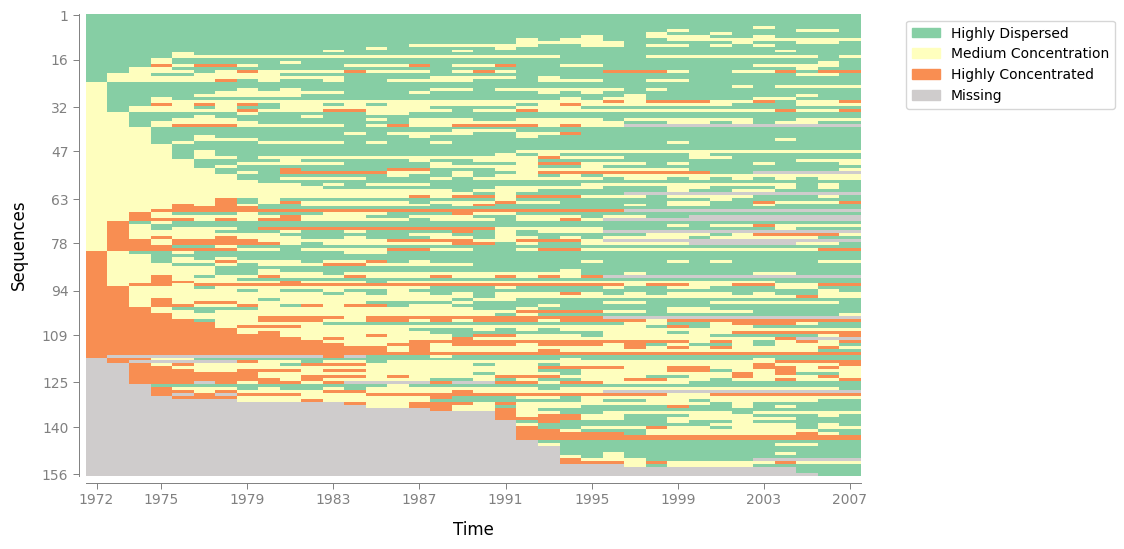

In [6]:
# Plot the index plot for HHI_state (Domain 1)

plot_sequence_index(sequence_data_hhi, 
                    # save_as='index_plot_hhi'
                    )


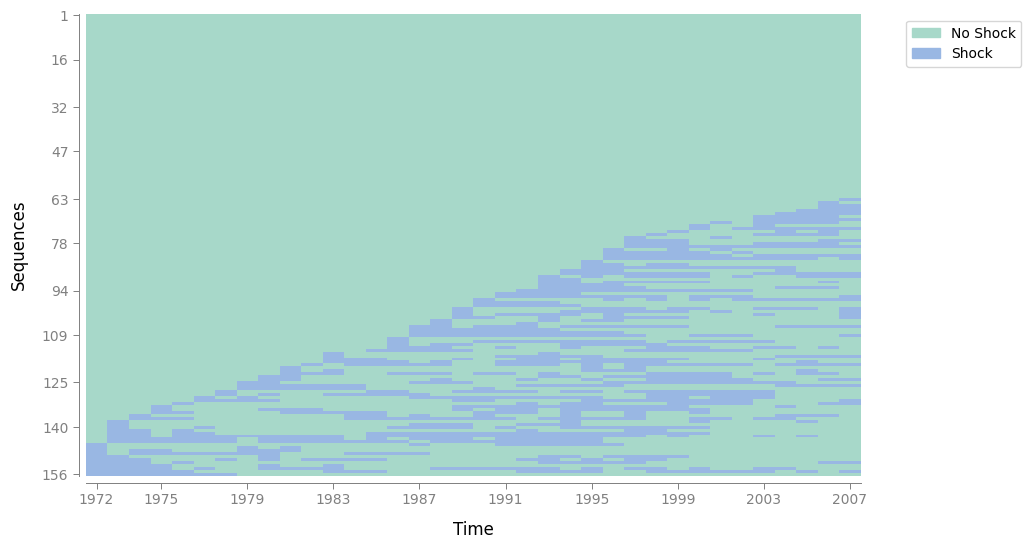

In [7]:
# Plot the index plot for AidShock (Domain 2)

plot_sequence_index(sequence_data_shock, 
                    # save_as='index_plot_shock'
                    )


In [8]:
sequence_data = [sequence_data_hhi, sequence_data_shock]

result = get_association_between_domains(
    sequence_data,
    assoc=["V", "LRT"],
    rep_method="overall",
    cross_table=True,
    weighted=True,
    dnames=["donor_concentration", "donor_shock"], 
    # It is domain name that you specify by yourself, e.g., seq_left - > left
    explain=True,
)


📜 Full results table:


,df,LRT,p(LRT),v,p(v),strength
donor_concentration vs donor_shock,3.0,290.900683,0.000 ***,0.186314,0.000 ***,Weak



📘 Column explanations:
  - df       : Degrees of freedom for the test (typically 1 for binary state sequences).
  - LRT      : Likelihood Ratio Test statistic (higher = stronger dependence).
  - p(LRT)   : p-value for LRT + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - v        : Cramer's V statistic (0 to 1, measures association strength).
  - p(v)     : p-value for Cramer's V (based on chi-squared test) + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - strength : Qualitative label for association strength based on Cramer's V:
               0.00-0.09 -> None, 0.10-0.29 -> Weak, 0.30-0.49 -> Moderate, >=0.50 -> Strong


In [9]:
cat_distance_matrix = compute_cat_distance_matrix(sequence_data, 
                                                  method="OM", 
                                                  sm=["CONSTANT"],
                                                  indel=[1, 1],  # indel=[1, 1] if you have two domains
                                                  what="diss", 
                                                  link="sum")

cat_distance_matrix

[>] 2 domains with 156 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Including missing value as an additional state.
[>] Computing substitution cost matrix for domain 0.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Azerbaijan,Bahamas,Bahrain,...,United Arab Emirates,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Yugoslavia,Zambia,Zimbabwe
Afghanistan,0.0,22.0,50.0,22.0,52.0,24.0,44.0,12.0,32.0,58.0,...,38.0,18.0,22.0,74.0,36.0,34.0,24.0,18.0,40.0,36.0
Albania,22.0,0.0,36.0,26.0,40.0,20.0,34.0,16.0,12.0,28.0,...,14.0,24.0,28.0,42.0,22.0,22.0,22.0,22.0,26.0,22.0
Algeria,50.0,36.0,0.0,60.0,22.0,44.0,30.0,20.0,20.0,24.0,...,26.0,56.0,12.0,50.0,40.0,38.0,66.0,26.0,70.0,66.0
Angola,22.0,26.0,60.0,0.0,64.0,30.0,38.0,18.0,40.0,70.0,...,44.0,20.0,26.0,84.0,38.0,38.0,22.0,10.0,32.0,40.0
Antigua & Barbuda,52.0,40.0,22.0,64.0,0.0,44.0,24.0,24.0,14.0,30.0,...,20.0,62.0,20.0,52.0,44.0,44.0,70.0,32.0,76.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,34.0,22.0,38.0,38.0,44.0,28.0,42.0,14.0,24.0,42.0,...,30.0,34.0,20.0,64.0,24.0,0.0,32.0,22.0,48.0,50.0
Yemen,24.0,22.0,66.0,22.0,70.0,32.0,46.0,14.0,42.0,64.0,...,46.0,12.0,24.0,82.0,38.0,32.0,0.0,24.0,32.0,40.0
Yugoslavia,18.0,22.0,26.0,10.0,32.0,24.0,30.0,18.0,12.0,26.0,...,12.0,22.0,24.0,48.0,20.0,22.0,24.0,0.0,26.0,30.0
Zambia,40.0,26.0,70.0,32.0,76.0,50.0,38.0,32.0,60.0,68.0,...,60.0,36.0,30.0,66.0,52.0,48.0,32.0,26.0,0.0,34.0


[>] Converting DataFrame to NumPy array...


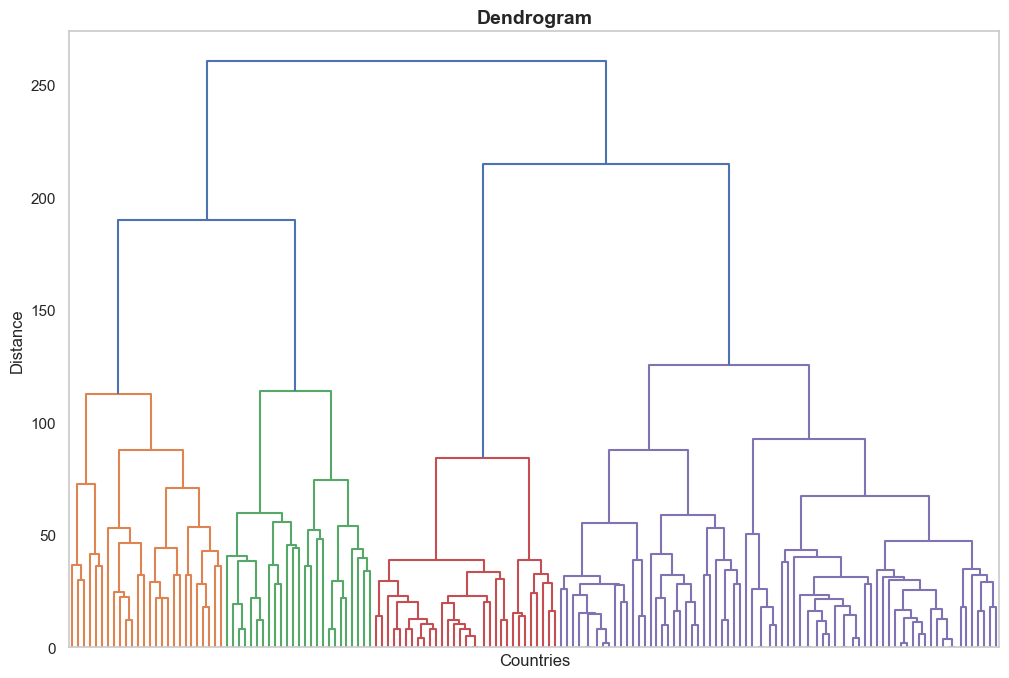

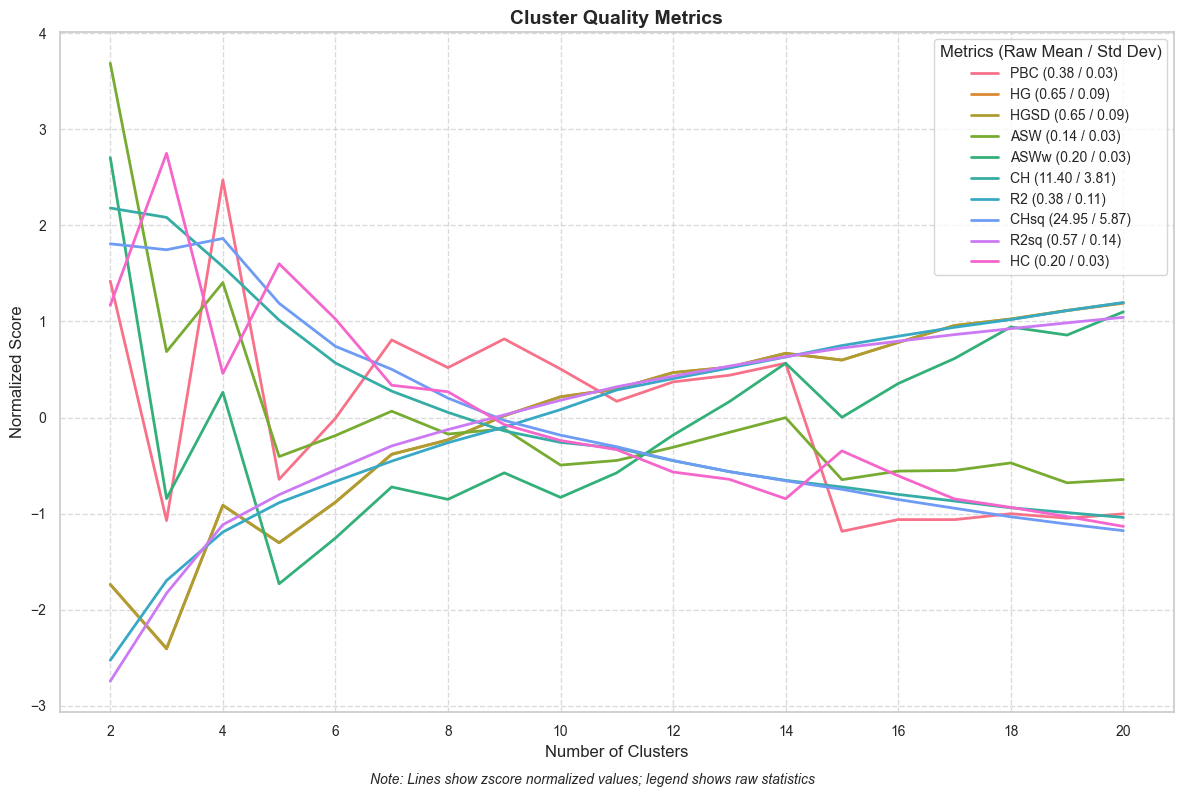

  Metric  Opt. Clusters  Raw Value  Z-Score Norm.
0    PBC              4   0.449986       2.473606
1     HG             20   0.764937       1.190250
2   HGSD             20   0.757800       1.193651
3    ASW              2   0.260417       3.688917
4   ASWw              2   0.270234       2.706316
5     CH              2  19.703910       2.181231
6     R2             20   0.509416       1.197601
7   CHsq              4  35.902452       1.864250
8   R2sq             20   0.715903       1.043594
9     HC              3   0.281253       2.750645


In [10]:
cluster = Cluster(cat_distance_matrix, sequence_data_hhi.ids, clustering_method='ward_d2')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_cqi_scores(norm='zscore')
summary_table = cluster_quality.get_cqi_table()
print(summary_table)

             Entity ID  Cluster
0          Afghanistan        3
1              Albania        4
2              Algeria        4
3               Angola        4
4    Antigua & Barbuda        4
..                 ...      ...
151            Vietnam        4
152              Yemen        3
153         Yugoslavia        4
154             Zambia        3
155           Zimbabwe        1

[156 rows x 2 columns]
   Cluster  Count  Percentage
0        1     26       16.67
1        2     25       16.03
2        3     31       19.87
3        4     74       47.44


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo/sequenzo/clustering/hierarchical_clustering.py:1104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y=y_column, data=distribution, palette='pastel')


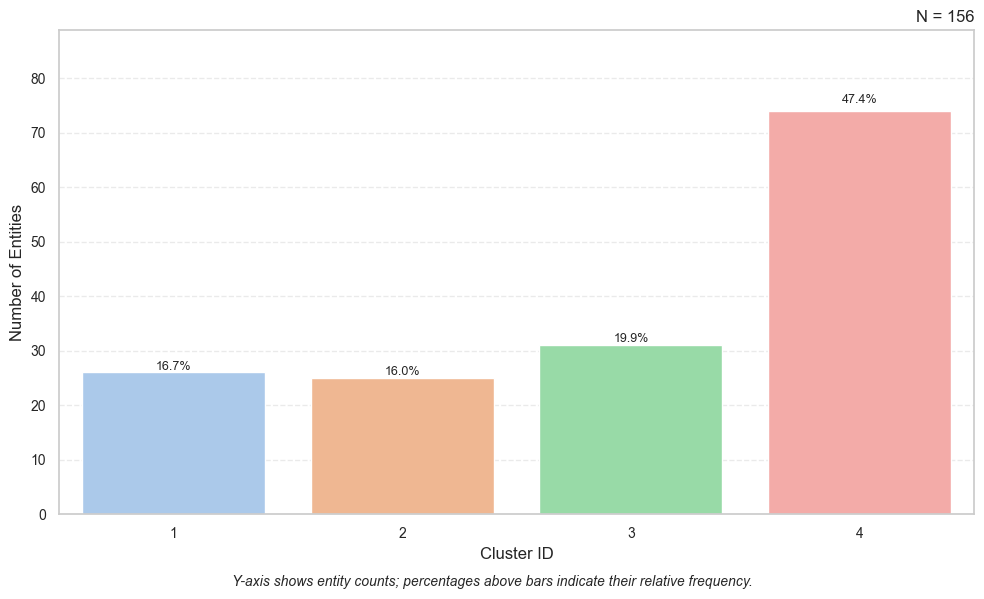

In [11]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, save_as="distribution.png", title=None)

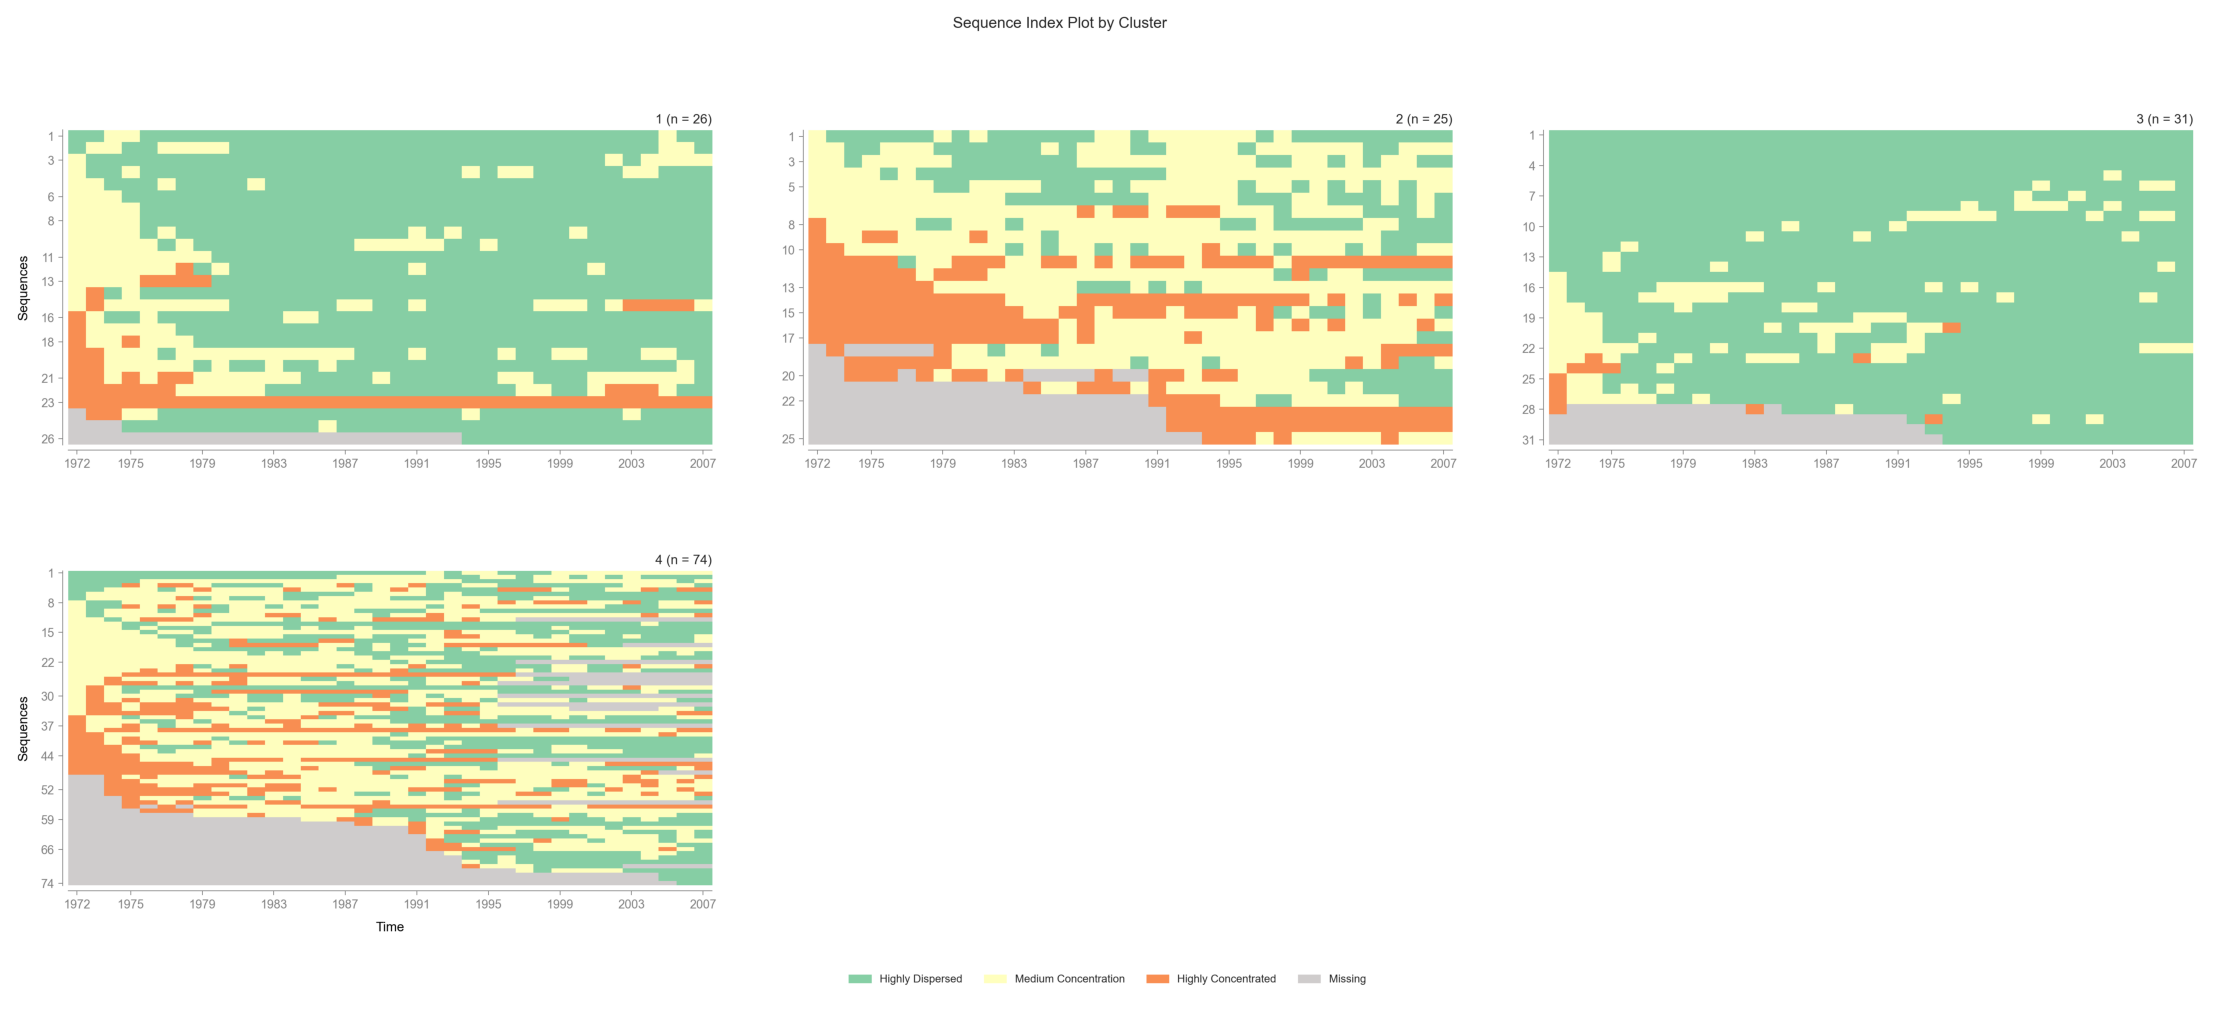

In [12]:
plot_sequence_index(
    sequence_data_hhi,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

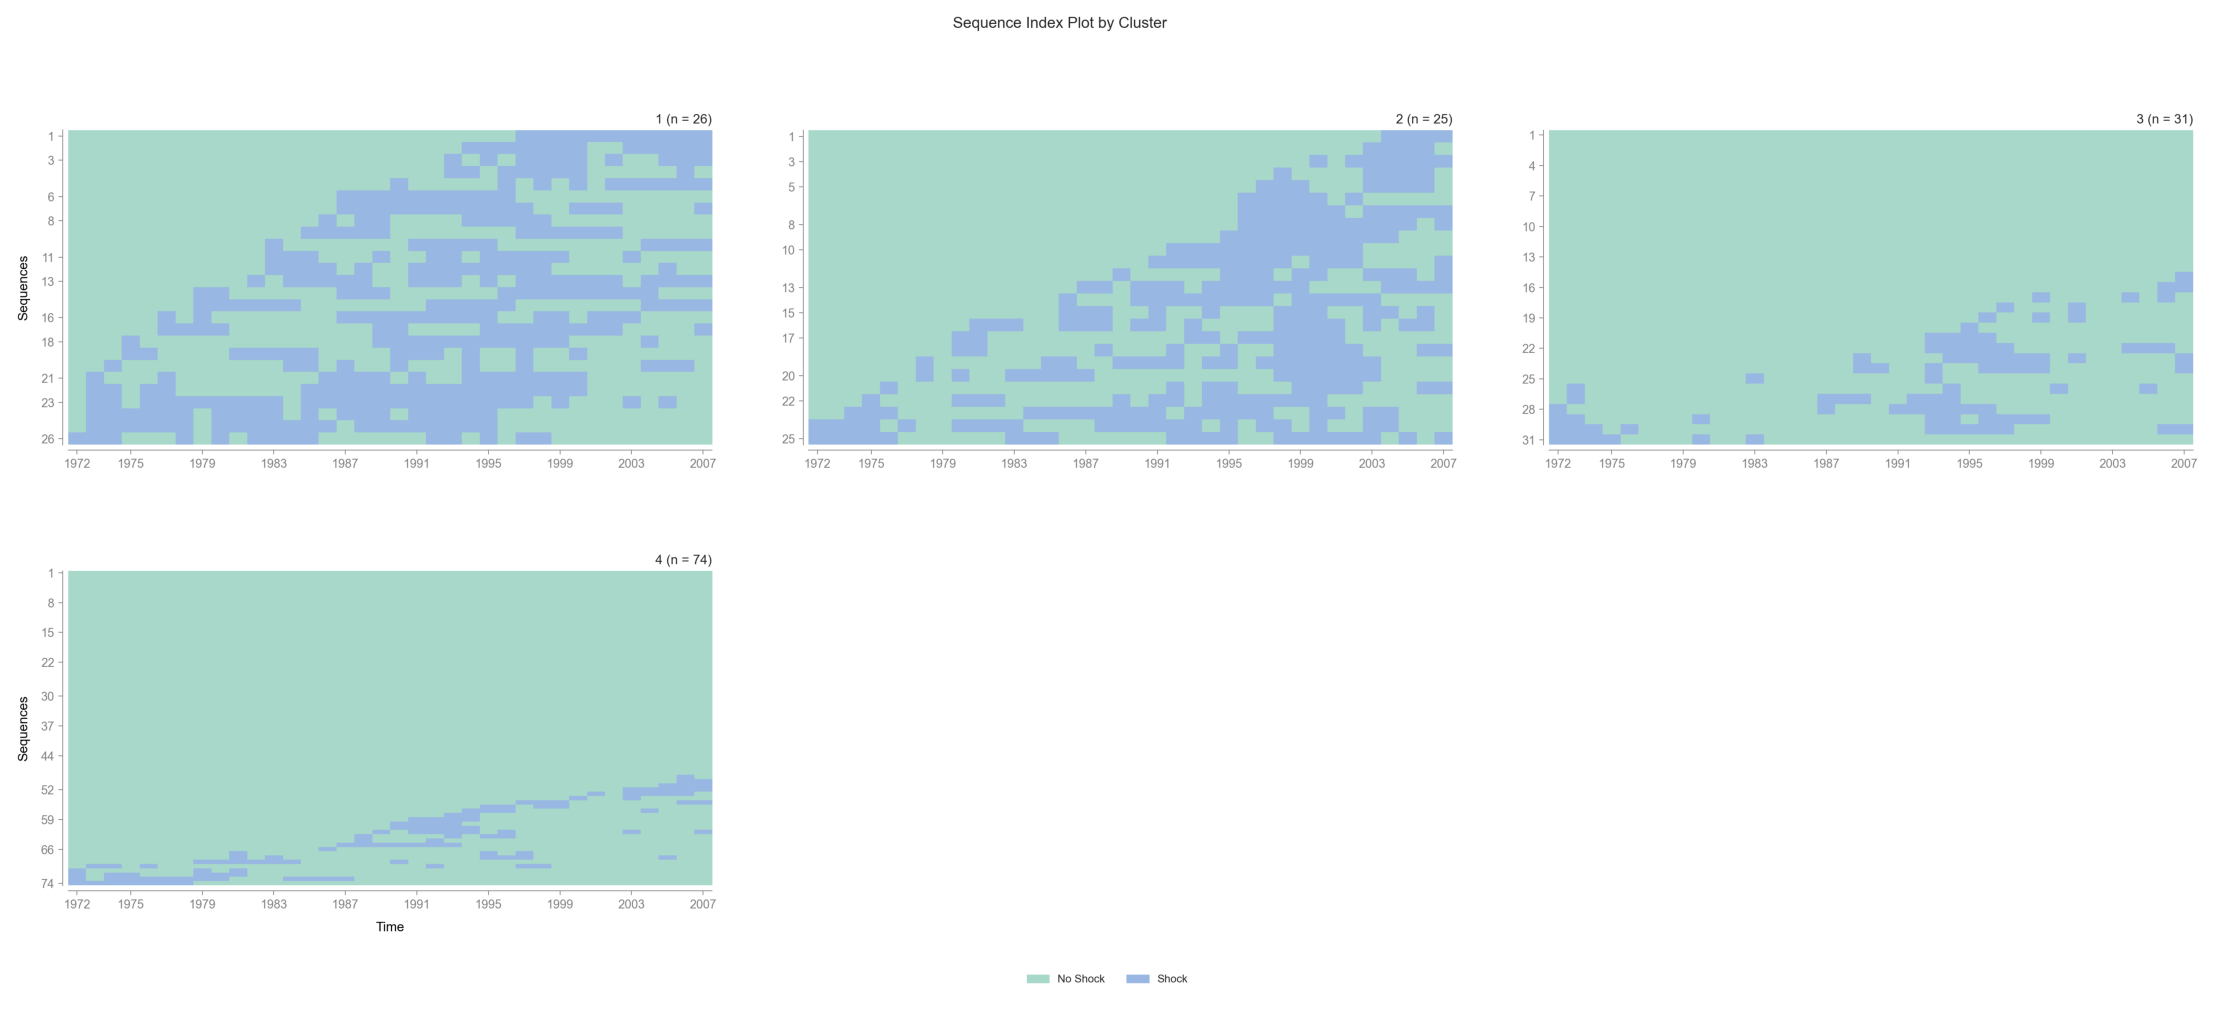

In [13]:
plot_sequence_index(
    sequence_data_shock,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

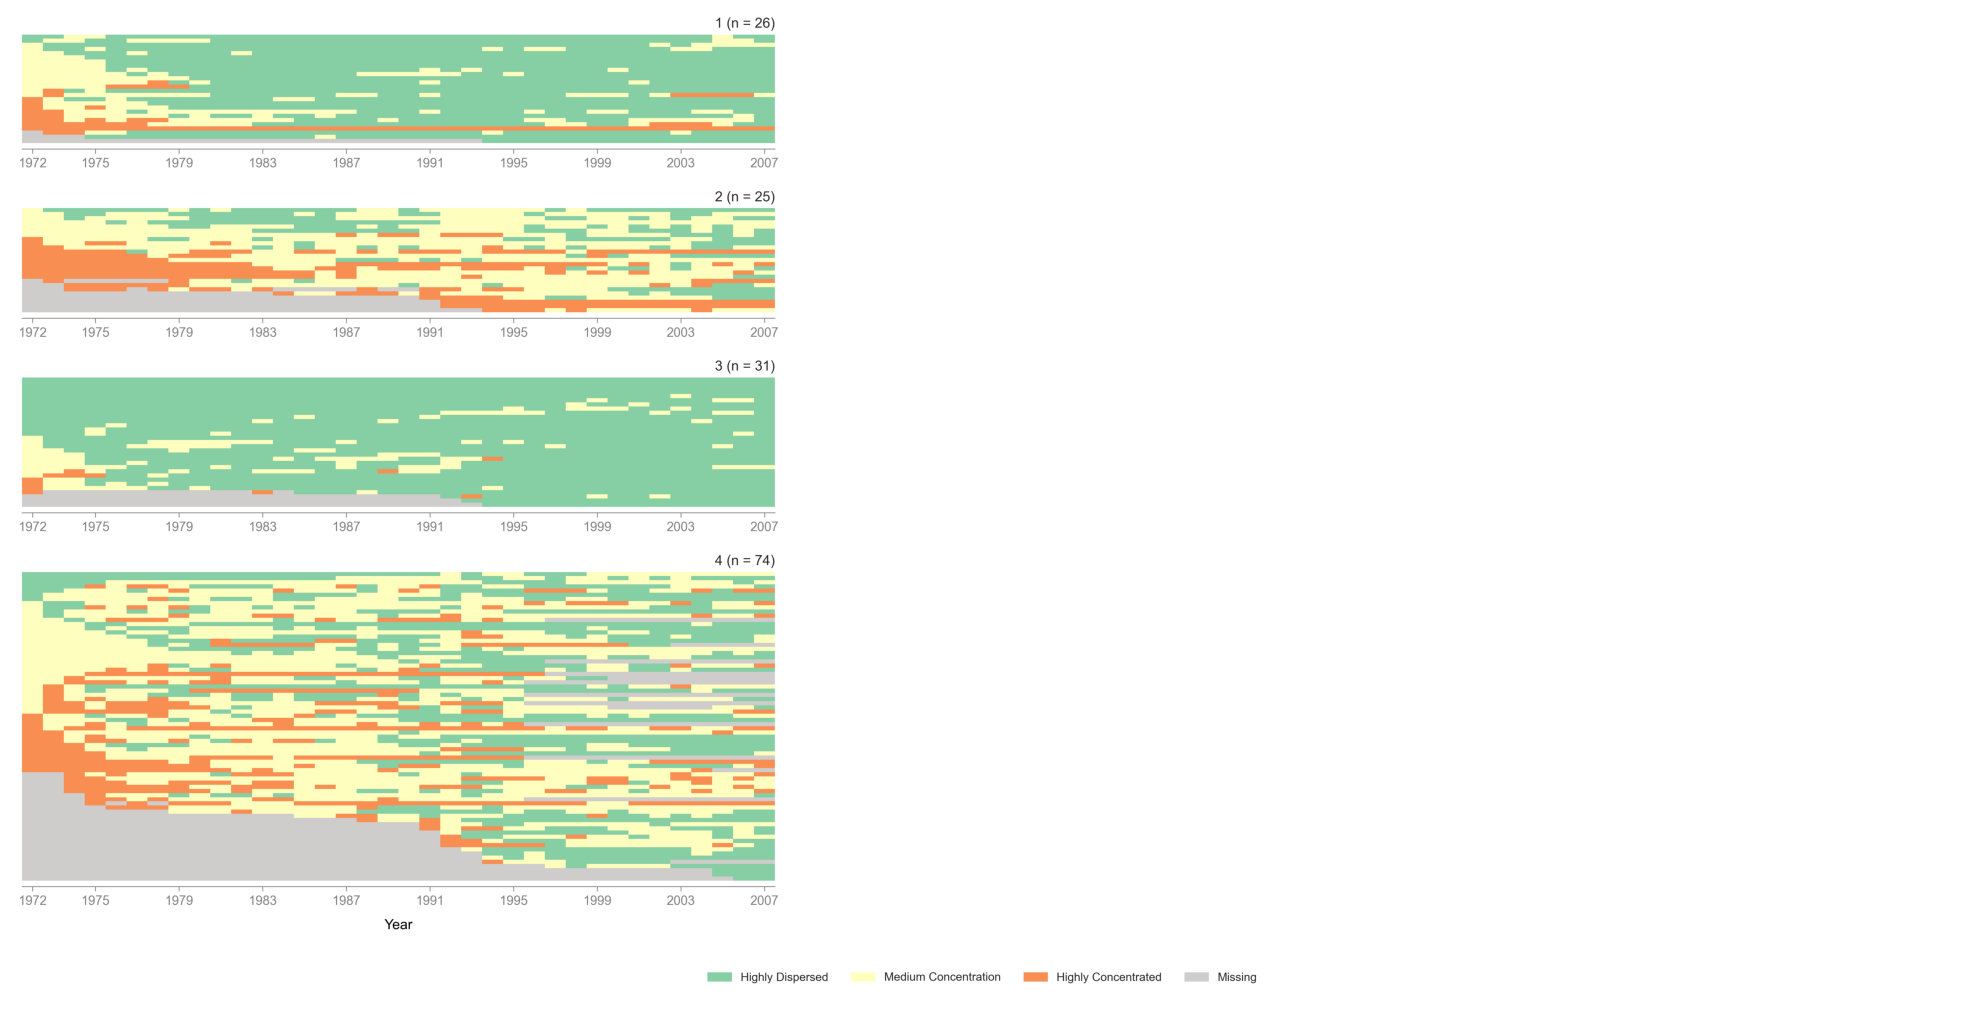

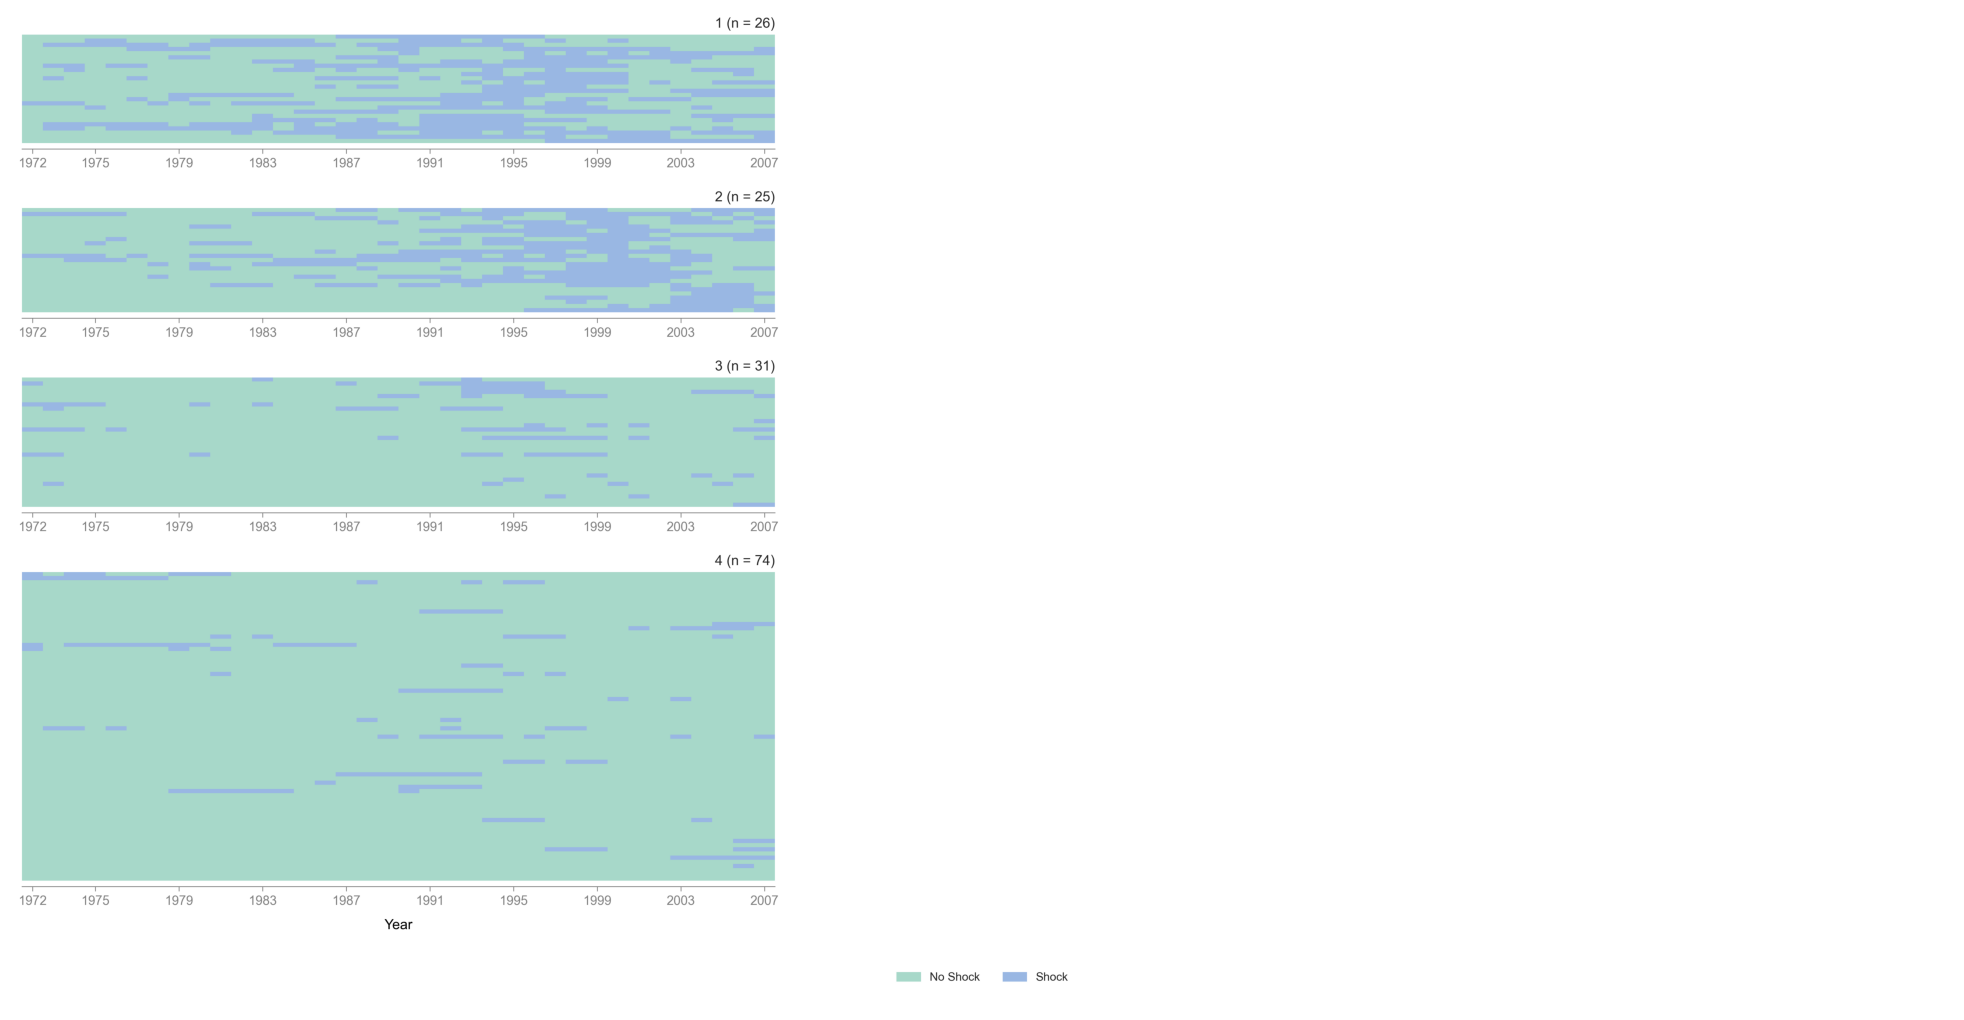

In [14]:
# Step 1: Plot the first sequence (workunit) and get the sorted ID order
# This will return a dictionary with group names as keys and sorted ID arrays as values
sorted_ids_by_group = plot_sequence_index(
    sequence_data_hhi,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    show_title=False,
    return_sorted_ids=True,  # Return the sorted ID order for alignment
    proportional_scaling=True,  # Scale subplot heights proportionally based on group sizes
    hide_y_axis=True,
    xlabel="Year",
    save_as="multidomain_hhi_4clusters.png",
    dpi=300
)

# Step 2: Flatten the sorted IDs from all groups into a single list
# This maintains the order across groups so IDs align between the two plots
# Note: Python 3.7+ dictionaries maintain insertion order, so iterating directly
# preserves the group order as they appear in the plot
import numpy as np
if sorted_ids_by_group is not None:
    # Get all sorted IDs in order (maintaining group order as they appear in the plot)
    all_sorted_ids = []
    for group_name in sorted_ids_by_group.keys():  # Iterate in insertion order (plot order)
        all_sorted_ids.extend(sorted_ids_by_group[group_name])
    all_sorted_ids = np.array(all_sorted_ids)
else:
    all_sorted_ids = None

# Step 3: Plot the second sequence (occupation) using the same ID order
# This ensures that each row (ID) appears in the same position in both plots
plot_sequence_index(
    sequence_data_shock,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    show_title=False,
    sort_by_ids=all_sorted_ids,  # Use the sorted IDs from the first plot to align rows
    proportional_scaling=True,  # Scale subplot heights proportionally based on group sizes
    hide_y_axis=True,
    xlabel="Year",
    save_as="multidomain_shock_4clusters.png",
    dpi=300
)